<a href="https://colab.research.google.com/github/Collokd/Core-Week-4---Independent-Project---Collins-Kemboi/blob/master/Core_Week_4_Independent_Project_Collins_Kemboi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WEEK 4 INDEPENDENT PROJECT**

#1.DEFINING THE ANALYTIC QUESTION

## a) SPECIFYING THE DATA ANALYTIC QUESTION

To determine if the average number of Bluecars taken in a year is equal to a hundred in Paris, France during weekdays as shown from records from the tax department.

##b) DEFINING THE METRICS OF SUCCESS

 
1.   Testing the null hypothesis whether the average of Bluecars taken in a year is equal to 100.


##c) UNDERSTANDING THE CONTEXT

The research problem is to determine if the yearly average of Bluechip cars taken are above 100. If above a hundred the Autolib will be eligble to apply for a tax relief, according to France policy of encouraging green energy transport in Paris.

##d) RECORDING THE EXPERIMETAL DESIGN 

1.   We will first conduct univariate analysis which will give us insight into each collected variable
2.   We will then conduct bivariate analysis which will enable us to check relationships between our collected variables





##e) DATA RELEVANCE
Our data is relevant as it is able to test our null hypothesis.

#2.READING DATA

### IMPORTING OUR LIBRARIES

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING THE DATASET

In [290]:
# Loading our dataset
# Dataset 
url = 'http://bit.ly/DSCoreAutolibDataset'  

df = pd.read_csv(url)

df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [291]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


#3.CHEKING THE DATA

In [292]:
# Cheking the no. records of data in our dataset
df.shape

(16085, 13)

In [293]:
#Preview the top of our dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [294]:
# Pre view botton of our dataset

df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [295]:
# Checking the datatypes oof our dataset
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# 4.EXTERNAL DATASOURCE VALIDATION

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to our dataset. 

# 5.TIDYING THE DATASET

In [0]:
#Dropping columns we will not use in our analysis
df.drop(['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum'
, 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum' ],axis=1,inplace= True)



In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Postal code            16085 non-null  int64 
 1   date                   16085 non-null  object
 2   n_daily_data_points    16085 non-null  int64 
 3   dayOfWeek              16085 non-null  int64 
 4   day_type               16085 non-null  object
 5   BlueCars_taken_sum     16085 non-null  int64 
 6   BlueCars_returned_sum  16085 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 879.8+ KB


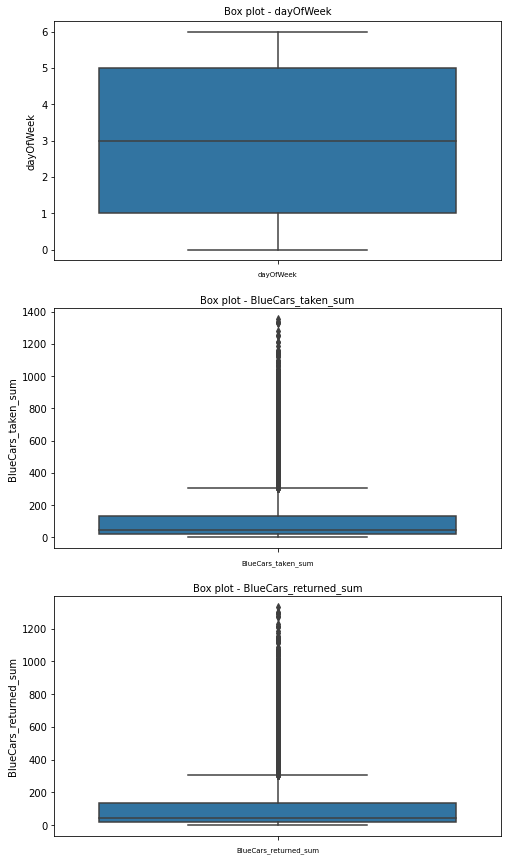

In [298]:
# Cheking for outliers

col_names = ['dayOfWeek', 'BlueCars_taken_sum', 'BlueCars_returned_sum']
fig, ax = plt.subplots(len(col_names), figsize=(8,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=7)
  
plt.show()

In [299]:
# REMOVING OUTLIERS
df = df[df['BlueCars_taken_sum'] <= 210]
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


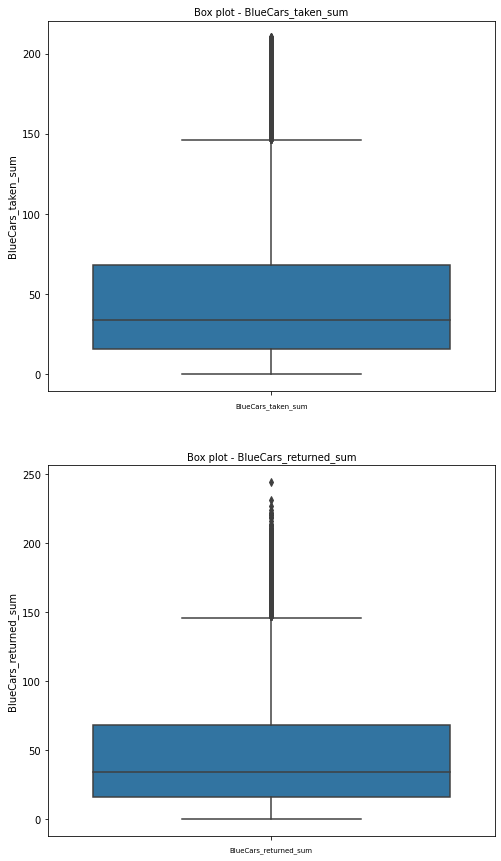

In [300]:
# Checking for outliers

col_names = ['BlueCars_taken_sum', 'BlueCars_returned_sum']
fig, ax = plt.subplots(len(col_names), figsize=(8,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=7)

In [301]:
#check anomalies for numerical data
df.describe() 

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
count,13093.000000,13093.000000,13093.000000,13093.000000,13093.000000
mean,91451.093027,1431.072787,2.946002,49.939204,49.961506
std,5144.042510,33.608766,2.003450,46.020983,45.894736
min,75001.000000,1174.000000,0.000000,0.000000,0.000000
25%,92210.000000,1439.000000,1.000000,16.000000,16.000000
50%,92500.000000,1440.000000,3.000000,34.000000,34.000000
75%,93800.000000,1440.000000,5.000000,68.000000,68.000000
max,95880.000000,1440.000000,6.000000,210.000000,244.000000


In [302]:
# Identifying the Missing Data
#
df.isnull().sum()

Postal code              0
date                     0
n_daily_data_points      0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
dtype: int64

In [303]:
# Dealing with the Missing Data
#

df.dropna(axis=0, how = 'any', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13093 entries, 0 to 16084
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Postal code            13093 non-null  int64 
 1   date                   13093 non-null  object
 2   n_daily_data_points    13093 non-null  int64 
 3   dayOfWeek              13093 non-null  int64 
 4   day_type               13093 non-null  object
 5   BlueCars_taken_sum     13093 non-null  int64 
 6   BlueCars_returned_sum  13093 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 818.3+ KB


In [304]:
#DROPING DUPLICATE VALUES

df.drop_duplicates()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10
16081,95880,6/16/2018,1440,5,weekend,19,19
16082,95880,6/17/2018,1440,6,weekend,33,35
16083,95880,6/18/2018,1440,0,weekday,11,14


In [305]:
# Filtering our data to remain with weekday dataset
weekday = df[df['day_type']=='weekday']
weekday.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [306]:
weekday.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
16078,95880,6/13/2018,1440,2,weekday,12,13
16079,95880,6/14/2018,1439,3,weekday,15,13
16080,95880,6/15/2018,1440,4,weekday,15,10
16083,95880,6/18/2018,1440,0,weekday,11,14
16084,95880,6/19/2018,1370,1,weekday,2,2


In [307]:
weekday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9484 entries, 0 to 16084
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Postal code            9484 non-null   int64 
 1   date                   9484 non-null   object
 2   n_daily_data_points    9484 non-null   int64 
 3   dayOfWeek              9484 non-null   int64 
 4   day_type               9484 non-null   object
 5   BlueCars_taken_sum     9484 non-null   int64 
 6   BlueCars_returned_sum  9484 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 592.8+ KB


# Exporting our clean csv file.

In [0]:
weekday.to_csv("autolib_clean.csv")

In [309]:
url2 = 'autolib_clean.csv'

clean = pd.read_csv(url2)

clean.head()

,Unnamed: 0,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,0,75001,1/1/2018,1440,0,weekday,110,103
1,1,75001,1/2/2018,1438,1,weekday,98,94
2,2,75001,1/3/2018,1439,2,weekday,138,139
3,3,75001,1/4/2018,1320,3,weekday,104,104
4,4,75001,1/5/2018,1440,4,weekday,114,117


# Random Sampling

Using Random Sampling to select our sample size (n) 370. This sample size(n) has been calculated at 95% Confidence Level and allows a marginal error of 5%. The population size N is 9,525.

In [310]:
clean.head(5)

,Unnamed: 0,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,0,75001,1/1/2018,1440,0,weekday,110,103
1,1,75001,1/2/2018,1438,1,weekday,98,94
2,2,75001,1/3/2018,1439,2,weekday,138,139
3,3,75001,1/4/2018,1320,3,weekday,104,104
4,4,75001,1/5/2018,1440,4,weekday,114,117


In [311]:
clean.tail(5)

,Unnamed: 0,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
9479,16078,95880,6/13/2018,1440,2,weekday,12,13
9480,16079,95880,6/14/2018,1439,3,weekday,15,13
9481,16080,95880,6/15/2018,1440,4,weekday,15,10
9482,16083,95880,6/18/2018,1440,0,weekday,11,14
9483,16084,95880,6/19/2018,1370,1,weekday,2,2


In [312]:
clean.shape

(9484, 8)

In [313]:
# Selecting the sample 
sample = clean.sample(n = 360, replace="False")
print(sample)

      Unnamed: 0  Postal code  ... BlueCars_taken_sum  BlueCars_returned_sum
235          355        75003  ...                197                    169
5192       10100        93100  ...                138                    135
905         3803        78150  ...                 31                     31
7813       13756        94140  ...                 42                     40
2895        6897        92260  ...                 35                     33
...          ...          ...  ...                ...                    ...
8116       14178        94160  ...                 58                     65
312          523        75004  ...                161                    166
6734       12252        93440  ...                  5                      5
8023       14050        94150  ...                 26                     26
8186       14276        94220  ...                 45                     49

[360 rows x 8 columns]


In [314]:
sample.shape

(360, 8)

In [315]:
sample.head()

,Unnamed: 0,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
235,355,75003,2/13/2018,1440,1,weekday,197,169
5192,10100,93100,5/28/2018,1440,0,weekday,138,135
905,3803,78150,3/5/2018,1440,0,weekday,31,31
7813,13756,94140,1/11/2018,1440,3,weekday,42,40
2895,6897,92260,2/6/2018,1439,1,weekday,35,33


# 6.EXPLANATORY ANAYSIS

##UNIVARIATE ANALYSIS

In [316]:
# Measure of Central Tendancy for categorical data

f_mode =sample[['dayOfWeek']].mode()
f_mode

# From the data we can observe that Monday's are the most common days for taking a Bluecar.

,dayOfWeek
0,1


In [317]:
# Measure of Central Tendancy for numerical
sample.describe()
# 25% is the first quatile
# 50% is the median
# 75% is the third quatile
# std is the standard deviation

,Unnamed: 0,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,9141.594444,90972.433333,1431.550000,1.961111,49.877778,50.047222
std,4164.648493,5710.805864,34.255598,1.391834,45.917348,45.012168
min,21.000000,75001.000000,1174.000000,0.000000,0.000000,0.000000
25%,5909.250000,92190.000000,1439.000000,1.000000,18.000000,19.000000
50%,9586.500000,92600.000000,1440.000000,2.000000,33.000000,34.000000
75%,12775.250000,93700.000000,1440.000000,3.000000,66.000000,66.250000
max,15959.000000,95880.000000,1440.000000,4.000000,197.000000,199.000000


In [318]:
# INTERQUATILE BlueCars_taken_sum
q1_,q3_ = np.percentile(sample['BlueCars_taken_sum'],[25,75])
iqr_ = q3_ - q1_
print('THE BlueCars_taken_sum INTERQUATILE RANGE IS',iqr_)
# confidence interval
l_bound_ = q1_ - (1.5*iqr_)
u_bound_ = q3_ + (1.5*iqr_)
print('Confidence interval is =',u_bound_,'--',l_bound_ )
print('\n')


THE BlueCars_taken_sum INTERQUATILE RANGE IS 48.0
Confidence interval is = 138.0 -- -54.0




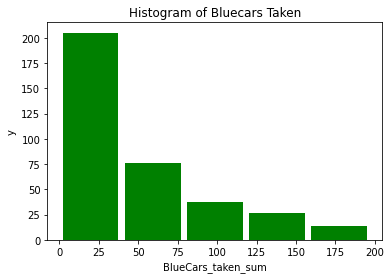

In [319]:
# 
x = sample['BlueCars_taken_sum']

plt.hist(x, bins = 5, histtype='bar', rwidth=0.9, color = 'green')

plt.xlabel('BlueCars_taken_sum')
plt.ylabel('y')
plt.title('Histogram of Bluecars Taken') 
plt.show()



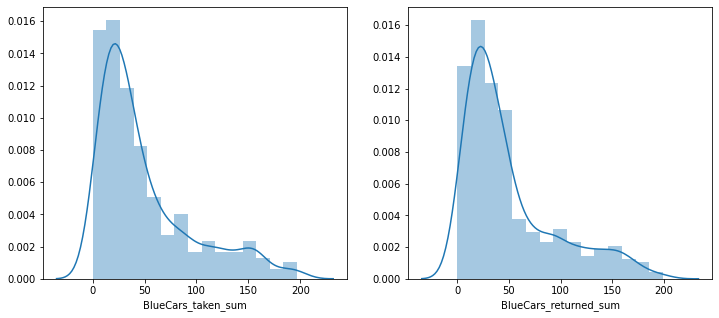

In [320]:
# Visualizing Univariate Data
# Histogram
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,5))
sns.distplot(sample['BlueCars_taken_sum'],ax = ax1)
sns.distplot(sample['BlueCars_returned_sum'],ax = ax2)

In [321]:
#SKEWNESS
print("BlueCars_taken_sum SKEWNWSS = ",sample['BlueCars_taken_sum'].skew())
print("BlueCars_taken_sum KURTOSIS = ",sample['BlueCars_taken_sum'].kurt())
print('\n')
print("BlueCars_returned_sum SKEWNWSS = ",sample['BlueCars_returned_sum'].skew())
print("BlueCars_returned_sum KURTOSIS = ",sample['BlueCars_returned_sum'].kurt())

BlueCars_taken_sum SKEWNWSS =  1.3735745690325507
BlueCars_taken_sum KURTOSIS =  1.07362767431579


BlueCars_returned_sum SKEWNWSS =  1.3370911268081707
BlueCars_returned_sum KURTOSIS =  0.9332545526148515


In [322]:
from numpy.random import seed
from numpy.random import randn

# imporing the shapiro function
from scipy.stats import shapiro 

# generating univariate observations
#data = 5 * randn(100) + 50

# testing for normality
stat, p = shapiro(sample['BlueCars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.832, p=0.000
Sample does not look Gaussian


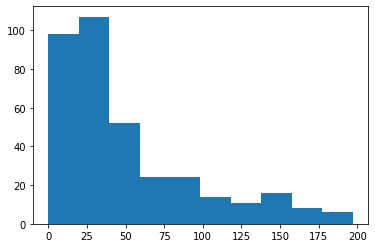

In [323]:
from matplotlib import pyplot
pyplot.hist(sample['BlueCars_taken_sum'])
pyplot.show()

In [324]:
# Importing anderson function form scipy 
from scipy.stats import anderson

# seed the random number generator
seed(1)

# generate univariate observations


# normality test
result = anderson(sample['BlueCars_taken_sum'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal' % (sl, cv))

Statistic: 21.101
15.000: 0.570, data does not look normal
10.000: 0.649, data does not look normal
5.000: 0.779, data does not look normal
2.500: 0.908, data does not look normal
1.000: 1.080, data does not look normal


##BIVARIATE ANAYSIS

In [325]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 235 to 8186
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             360 non-null    int64 
 1   Postal code            360 non-null    int64 
 2   date                   360 non-null    object
 3   n_daily_data_points    360 non-null    int64 
 4   dayOfWeek              360 non-null    int64 
 5   day_type               360 non-null    object
 6   BlueCars_taken_sum     360 non-null    int64 
 7   BlueCars_returned_sum  360 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 25.3+ KB


In [326]:
# Analysis of our numeric data

!pip install researchpy
import researchpy as rp
print('Blue cars Taken with respect to day of the week')
print(round(rp.summary_cont(sample.groupby(['dayOfWeek'])['BlueCars_taken_sum'])))
print('\n')




Blue cars Taken with respect to day of the week


            N  Mean    SD   SE  95% Conf.  Interval
dayOfWeek                                          
0          70  46.0  44.0  5.0       36.0      57.0
1          80  46.0  43.0  5.0       37.0      56.0
2          69  58.0  55.0  7.0       45.0      71.0
3          76  53.0  44.0  5.0       43.0      63.0
4          65  46.0  44.0  5.0       36.0      57.0




Text(0.5, 1.0, 'Car Taken and Car Returned')

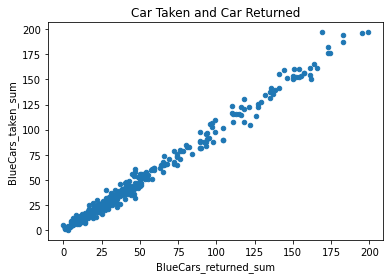

In [327]:
 # VISUALIVING RELATIONSHIP BETWEEN BlueCars_returned_sum and BlueCar taken
sample.plot(x= 'BlueCars_returned_sum', y= 'BlueCars_taken_sum', kind = "scatter")
plt.title("Car Taken and Car Returned")


# 7. Hypothesis testing

In [331]:
x = sample['BlueCars_taken_sum'].mean()

x

49.87777777777778

In [332]:
pop = clean['BlueCars_taken_sum'].mean()

pop

47.45086461408688

In [333]:
zscore = ( x - pop ) / clean['BlueCars_taken_sum'].std()
zscore


0.0536691868110982

In [335]:
#import norm function from the scipy library
from scipy.stats import norm
from scipy import stats
prob = 1 - stats.norm.cdf(zscore)
prob

0.4785993663843813